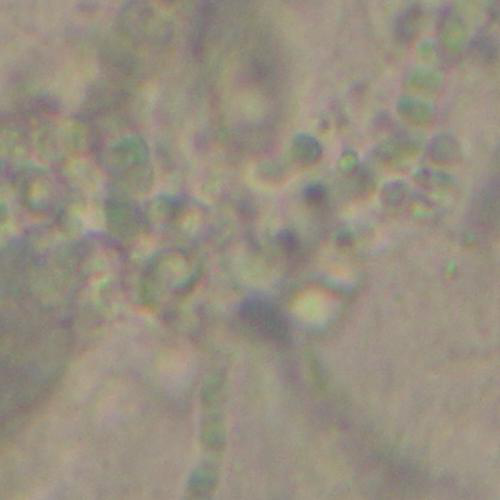

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from PIL import Image
import requests
import numpy as np
import pickle

# Import an image
img_url = "https://static.bc-edx.com/ai/ail-v-1-0/m19/lesson_2/datasets/H2_122c_4.jpg"
example_image = Image.open(requests.get(img_url, stream=True).raw)
example_image

Before we augment an image, we must preprocess it like we have before

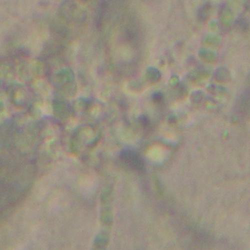

In [2]:
# Do some quick preprocessing
## Resize to 250 by 250
example_image = example_image.resize((250, 250), Image.LANCZOS)
example_image

In [3]:
# Convert to floating point and normalize
float_image = np.array(example_image).astype(np.float32) / 255
float_image


array([[[0.63529414, 0.5803922 , 0.54509807],
        [0.6313726 , 0.5764706 , 0.5411765 ],
        [0.6392157 , 0.58431375, 0.54901963],
        ...,
        [0.5411765 , 0.5254902 , 0.49019608],
        [0.5568628 , 0.49803922, 0.4862745 ],
        [0.5568628 , 0.49803922, 0.4862745 ]],

       [[0.6313726 , 0.5764706 , 0.53333336],
        [0.627451  , 0.57254905, 0.5294118 ],
        [0.63529414, 0.5803922 , 0.5372549 ],
        ...,
        [0.5294118 , 0.5137255 , 0.48235294],
        [0.56078434, 0.5019608 , 0.49411765],
        [0.56078434, 0.5019608 , 0.49411765]],

       [[0.627451  , 0.57254905, 0.5254902 ],
        [0.61960787, 0.5647059 , 0.52156866],
        [0.627451  , 0.5764706 , 0.5294118 ],
        ...,
        [0.5294118 , 0.5176471 , 0.4862745 ],
        [0.54901963, 0.5019608 , 0.4862745 ],
        [0.54901963, 0.5019608 , 0.4862745 ]],

       ...,

       [[0.59607846, 0.5529412 , 0.46666667],
        [0.6039216 , 0.56078434, 0.4745098 ],
        [0.6       , 0

In [4]:
# Look at the shape
float_image.shape

(250, 250, 3)

In [5]:
# The image generator requires a "batch" dimension
# I can add that using the "expand dims" function

# Add batch dimension
reshaped_image_array = np.expand_dims(float_image, axis=0)

# View the shape
reshaped_image_array.shape

(1, 250, 250, 3)

In [7]:
# Create an ImageDataGenerator with augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation (degrees)
    fill_mode='nearest'     # Fill mode for handling newly created pixels
)

# Create a new image based on the original image
augmented_image = next(datagen.flow(reshaped_image_array, batch_size=1))[0]


# View the shape of the new image
augmented_image.shape

(250, 250, 3)

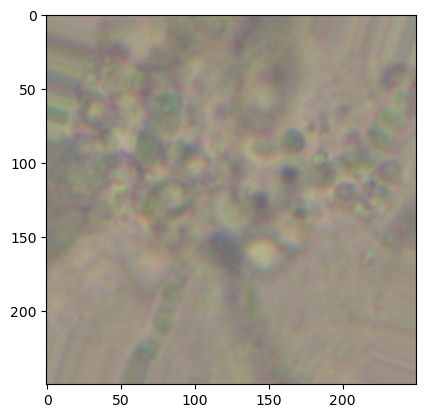

In [8]:
# Using a plotting library like matplot lib, I can view this image
# Plot the new image
# Note that I select all data from the first two dimensions, and specifically
# select the first value from the third dimension (color scale). I
# multiply by 255 to undo the normalization for plotting.

plt.imshow((augmented_image*255).astype('uint8'))
plt.show()


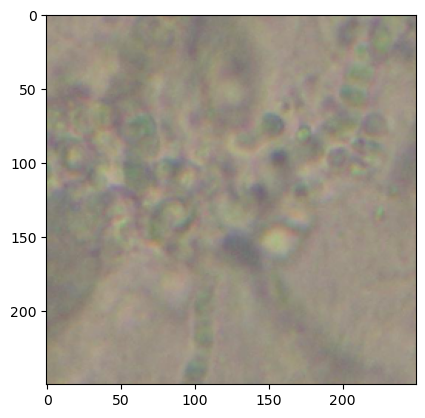

In [9]:
# Plot the original for comparison
plt.imshow((reshaped_image_array[0, :, :, :] * 255).astype('uint8'))